#Final Project
- Wayne Lopez
- Statistical Machine Learning (MATH 475)

# Data Exploration & Preprocessing

The Weather Forecast dataset contains weather observations for 2500 days with 6 different features per day (temperature, humidity, wind speed, cloud coverage, pressure, and whether it rained that day or not).

In [48]:
## Use Pandas to read the CSV file.
import pandas as pd
import seaborn as sns

data = pd.read_csv('weather_forecast_data.csv')
dataset = data.copy()

In [49]:
## Checking Dataset Dimensions
print("Dimensions:", dataset.shape)

## Checking Dataset Feature Names
print("Feature Names:", ", ".join(dataset.columns[:6].tolist()))

Dimensions: (2500, 6)
Feature Names: Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, Rain


In [50]:
## Checking Dataset Types
dataset.dtypes

,0
Temperature,float64
Humidity,float64
Wind_Speed,float64
Cloud_Cover,float64
Pressure,float64
Rain,object


In [51]:
## Checking Dataset Inital Rows
dataset.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


Before beginning visualization, I did early preprocessing by checking the dataset for any missing values in which none were found and capping outliers within each feature at a certain percentile to mitigrate the influence of extreme values.

In [52]:
## Handling missing values
# Checking for missing values
dataset.isnull().sum()

# Filling missing values with features mean
#dataset['feature'].fillna(dataset['feature'].mean(), inplace=True)

,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


In [53]:
## Handling potential outliers.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def cap_outliers(data, feature, lower_percentile=1, upper_percentile=99):
    lower_bound = data[feature].quantile(lower_percentile / 100)
    upper_bound = data[feature].quantile(upper_percentile / 100)
    data[feature] = np.clip(data[feature], lower_bound, upper_bound)
    return data

# Apply to numerical features:
for feature in numerical_features:
    dataset = cap_outliers(dataset, feature)

To begin the visualization process, I split the datasets features between categorical and numerical features as they will contain different properties that need to be handled seperately.

In [54]:
## Identifying categorical vs. Numerical Features
# Identifying categorical features
categorical_features = dataset.select_dtypes(include=['object']).columns
print('Categorical Features:', categorical_features)

# Identifying numerical features
numerical_features = dataset.select_dtypes(include=['number']).columns
print('Numerical Features:', numerical_features)

Categorical Features: Index(['Rain'], dtype='object')
Numerical Features: Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'], dtype='object')


I visualized the distributions of the datesets numerical features (temperature, humidity, wind speed, cloud coverage, and pressure), finding that the distributions appeared mostly bell-shaped (normal), indicating a generally even distribution of values across their respective ranges. However, some features, such as 'pressure', exhibited slight skewness.

In [55]:
## Numerical Features: Generate summary statistics.
numerical_features = dataset.select_dtypes(include=['number'])
summary_stats = numerical_features.describe()
print(summary_stats)

       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581925    64.346133     9.906154    49.655170  1014.313885
std       7.322211    19.939001     5.777323    29.106646    20.185336
min      10.264513    30.793183     0.141701     0.677278   980.858361
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.735273    99.089539    19.818915    98.739870  1049.413064


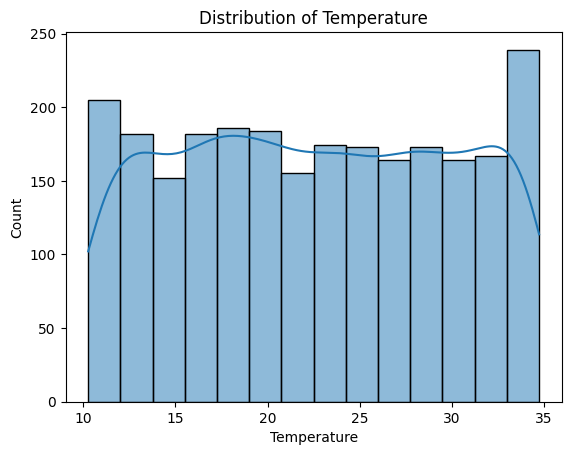

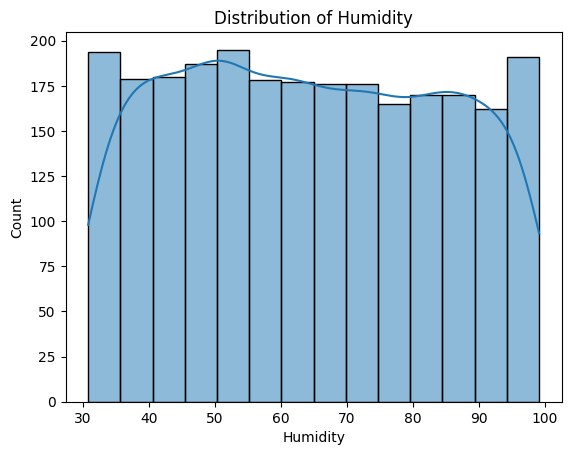

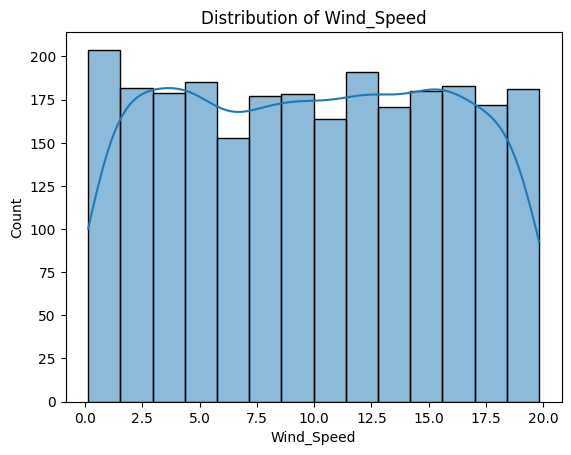

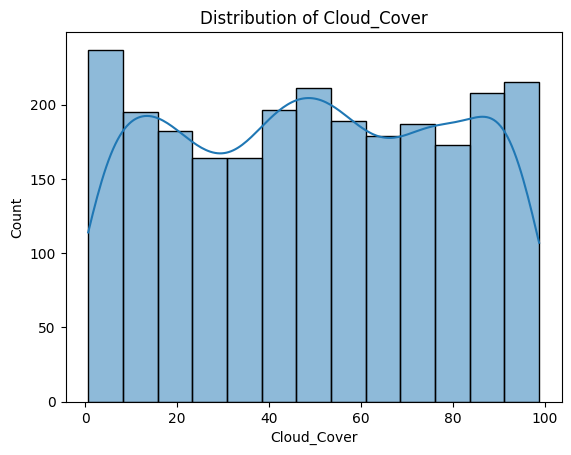

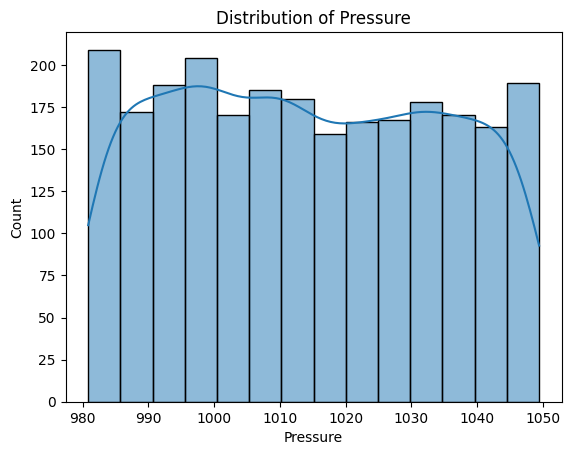

In [56]:
## Numerical Features: Visualize distributions.
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numerical_features:
    sns.histplot(dataset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [57]:
## Numerical Features: Identify skewness.
skewness = numerical_features.skew()
print(skewness)

Temperature    0.007828
Humidity       0.048788
Wind_Speed     0.000958
Cloud_Cover   -0.015322
Pressure       0.054487
dtype: float64


I visualized the distribution of the only categorical feature (rain_today) and noticed "no rain" values were considerably more frequent than "rain" values. Meaning the dataset has a higher prevalence of days without rain than days that did rain.

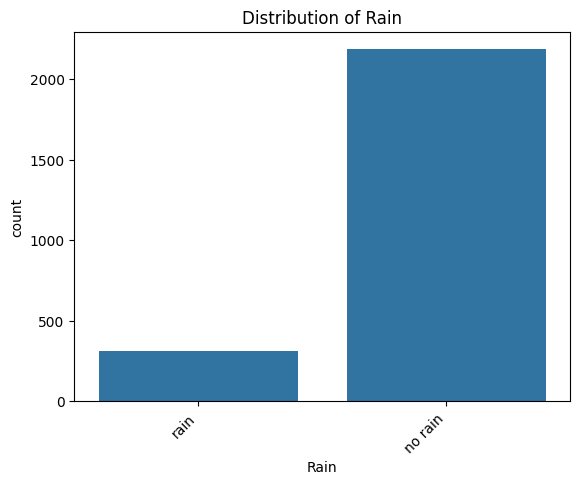

In [58]:
## Categorical Features: Analyze distribution and counts for categorical features
for feature in categorical_features:
    sns.countplot(x=dataset[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

To preprocess the weather forecast data, I scaled the numerical features (temperature, humidity, wind speed, cloud coverage, and pressure) using standardization. Finally, I encoded the categorical feature (rain) using label encoding, converting it into a numerical representation.

In [59]:
## Feature Scaling (Normalization/Standardization)
from sklearn.preprocessing import StandardScaler

numerical_features = dataset.select_dtypes(include=['number']).columns
scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

In [60]:
## Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

categorical_features = dataset.select_dtypes(include=['object']).columns
for feature in categorical_features:
    le = LabelEncoder()
    dataset[feature] = le.fit_transform(dataset[feature])

# Model Selection & Training

I began by selecting a Logistic Regression model for this binary classification task. Logistic Regression is a widely used and interpretable model that often serves as a good baseline. I opted for it due to its simplicity and efficiency in handling relatively smaller datasets.

Here's the training code for the Logistic Regression:

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

To evaluate the performance of the Logistic Regression, I used accuracy and the classification report, including precision, recall, and F1-score. I also generated a confusion matrix to visualize the model's performance.

Here's the classification summary for Logistic Regression:

Accuracy of Logistic Regression: 0.932
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       443
           1       0.73      0.63      0.68        57

    accuracy                           0.93       500
   macro avg       0.84      0.80      0.82       500
weighted avg       0.93      0.93      0.93       500



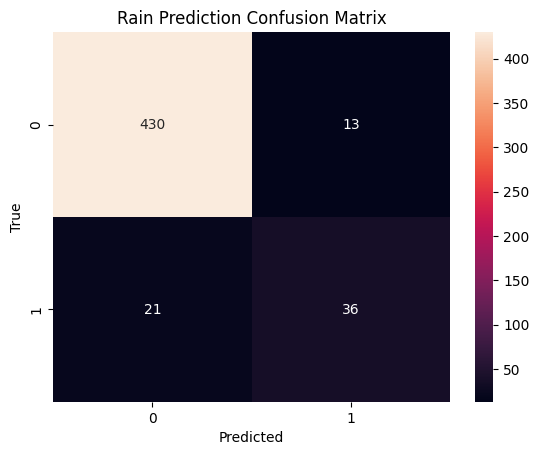

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Results for Logistic Regression
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy}")

report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Rain Prediction Confusion Matrix")
plt.show()

Next, I implemented a Random Forest Classifier for comparison. Random Forest is a method known for its high accuracy and ability to handle complex relationships in data. I chose it for its robustness and potential to improve upon the baseline Logistic Regression model.

Here's the training code for the Random Forest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Similar to the Logistic Regression evaluation, I used accuracy, classification report, and confusion matrix to assess the Random Forest Classifier's performance.

Here's the classification summary for Random Forest Classifier:

Accuracy of Random Forest Classifier: 0.998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



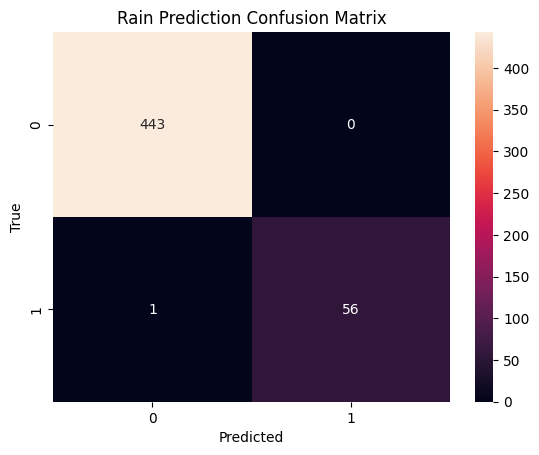

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Results for Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy}")

report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Rain Prediction Confusion Matrix")
plt.show()

Comparing the two models, the Random Forest Classifier clearly demonstrates a better performance in terms of accuracy, precision, recall, and F1-score. It effectively addresses the limitations observed in the Logistic Regression model, particularly in predicting "rain" events. This improvement can be attributed to the Random Forest's ensemble nature, which combines multiple decision trees to make more robust predictions.

In conclusion, the Random Forest Classifier is the preferred model for this rain prediction task due to its significantly higher accuracy and overall better performance in classifying both "no rain" and "rain